# Gamma Ray Normalisation

**Created by:** Andy McDonald  

This notebook illustrates carry out a simple normalisation on Gamma Ray data from the Volve Dataset.
Medium Article Link: 

## What is Normalization?

Normalization is the process of re-scaling or re-calibrating the well logs so that they are consistent with other logs in other wells within the field. This can be achieved by applying a single point normalization (linear shift) or a two point normalization ('stretch and squeeze') to the required curve. 

Normalization is commonly applied to gamma ray logs, but can be applied to neutron porosity, bulk density, sonic and spontaneous potential logs. Resistivity logs are generally not normalized unless there is a sufficient reason to do so (Shier, 2004). It should be noted that applying normalization can remove geological variations and features across the study area and should be considered carefully. Shier (2004) provides an excellent discussion and guidelines on how to carry out normalization on well log data.

## Loading and Checking Data
The first step is to import the required libraries: pandas and matplotlib.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Data/VolveWells.csv')

In [3]:
data.head()

,WELL,DEPTH,GR,AC,ACS,BS,CALI,DEN,NEU,PEF,RDEP,RMED
0,15/9-F-1 C,145.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15/9-F-1 C,146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15/9-F-1 C,146.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15/9-F-1 C,146.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15/9-F-1 C,146.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data['WELL'].unique()

array(['15/9-F-1 C', '15/9-F-4', '15/9-F-7'], dtype=object)

Using the unique method on the dataframe, we can see that we have 3 wells within this Volve Data subset:  
- 15/9-F-1 C
- 15/9-F-4
- 15/9-F-7

## Plotting the Raw Data

In [5]:
wells = data.groupby('WELL')
wells.head()

,WELL,DEPTH,GR,AC,ACS,BS,CALI,DEN,NEU,PEF,RDEP,RMED
0,15/9-F-1 C,145.9000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15/9-F-1 C,146.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15/9-F-1 C,146.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15/9-F-1 C,146.2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15/9-F-1 C,146.3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39481,15/9-F-4,200.3212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39482,15/9-F-4,200.4736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39483,15/9-F-4,200.6260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39484,15/9-F-4,200.7784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39485,15/9-F-4,200.9308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
wells.min()

,DEPTH,GR,AC,ACS,BS,CALI,DEN,NEU,PEF,RDEP,RMED
WELL,,,,,,,,,,,
15/9-F-1 C,145.9000,0.148800,NaN,NaN,8.50,8.304600,1.750600,0.045900,4.226300,0.086700,0.064900
15/9-F-4,200.3212,2.738081,53.358017,108.222015,8.50,8.296204,1.334123,0.045681,1.547774,0.480972,0.501000
15/9-F-7,239.5700,2.403074,NaN,NaN,12.25,NaN,NaN,NaN,NaN,0.665063,0.600974


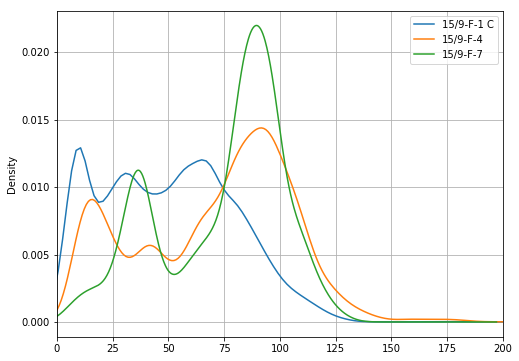

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
for label, df in wells:
    df.GR.plot(kind ='kde', ax=ax, label=label)
    plt.xlim(0, 200)
plt.grid(True)
plt.legend()
plt.savefig('before_normalisation.png', dpi=300)

From the plot above, we will assume that the key well is 15/9-F-7 and we will normalise the other two datasets to this one.  
  

## Calculating the Percentiles

It is possible that datasets can contain erroneous values which may affect the minimum and the maximum values within a curve. Therefore, some interpreters prefer to base their normalisation parameters on percentiles.  
  
In this example, I have used the 5th and 95th percentiles.

The first step is to calculate the percentile (or quantile as pandas refers to it) by grouping the data by wells and then applying the .quantile method to a specific column. In this case, GR. The quantile function takes in a decimal value, so a value of 0.05 is equivalent to the 5th percentile and 0.95 is equivalent to the 95th percentile.  

In [8]:
gr_percentile_05 = data.groupby('WELL')['GR'].quantile(0.05)
print(gr_percentile_05)

WELL
15/9-F-1 C     7.312130
15/9-F-4      12.406060
15/9-F-7      25.646473
Name: GR, dtype: float64


This calculation generates a pandas Series object. We can see what is in the series by calling upon it like so.

So now we need to bring that back into our main dataframe. We can do this using the map function, which will combine two data series that share a common column. Once it is mapped we can call upon the `.describe()` method and confirm that it has been added to the dataframe.

In [9]:
data['05_PERC'] = data['WELL'].map(gr_percentile_05)

In [10]:
data.describe()

,DEPTH,GR,AC,ACS,BS,CALI,DEN,NEU,PEF,RDEP,RMED,05_PERC
count,66843.000000,65154.000000,4815.000000,4243.000000,65745.000000,15060.000000,14938.000000,15042.000000,14938.000000,48315.000000,48338.000000,66843.000000
mean,1915.232292,59.063326,78.140015,142.814335,15.661887,8.541083,2.401113,0.188021,5.433473,8.065491,176.557392,10.494494
std,1108.591492,35.584211,13.415549,15.675952,5.936712,0.078575,0.154349,0.072923,1.507955,130.146455,3304.415559,5.118566
min,145.900000,0.148800,53.358017,108.222015,8.500000,8.296204,1.334123,0.045681,1.547774,0.086700,0.064900,7.312130
25%,910.546200,30.414851,67.192184,130.138168,12.250000,8.524083,2.256317,0.142900,4.832051,0.787265,0.792100,7.312130
50%,1850.965600,60.246799,76.447159,142.093720,17.500000,8.524300,2.417045,0.181000,5.357124,1.290400,1.340900,7.312130
75%,2859.950000,84.880524,87.095100,154.055313,17.500000,8.556900,2.539997,0.222500,6.267550,2.539700,2.848600,12.406060
max,4093.900000,1004.250000,130.757935,190.262665,36.000000,9.793900,3.201297,0.732381,20.646111,5571.435059,97543.421880,25.646473


We can then repeat the process for the 95th percentile:

In [11]:
gr_percentile_95 = data.groupby('WELL')['GR'].quantile(0.95)

In [12]:
gr_percentile_95

WELL
15/9-F-1 C     98.774478
15/9-F-4      118.843896
15/9-F-7      110.541397
Name: GR, dtype: float64

In [13]:
data['95_PERC'] = data['WELL'].map(gr_percentile_95)

In [14]:
data.describe()

,DEPTH,GR,AC,ACS,BS,CALI,DEN,NEU,PEF,RDEP,RMED,05_PERC,95_PERC
count,66843.000000,65154.000000,4815.000000,4243.000000,65745.000000,15060.000000,14938.000000,15042.000000,14938.000000,48315.000000,48338.000000,66843.000000,66843.000000
mean,1915.232292,59.063326,78.140015,142.814335,15.661887,8.541083,2.401113,0.188021,5.433473,8.065491,176.557392,10.494494,106.301846
std,1108.591492,35.584211,13.415549,15.675952,5.936712,0.078575,0.154349,0.072923,1.507955,130.146455,3304.415559,5.118566,9.290552
min,145.900000,0.148800,53.358017,108.222015,8.500000,8.296204,1.334123,0.045681,1.547774,0.086700,0.064900,7.312130,98.774478
25%,910.546200,30.414851,67.192184,130.138168,12.250000,8.524083,2.256317,0.142900,4.832051,0.787265,0.792100,7.312130,98.774478
50%,1850.965600,60.246799,76.447159,142.093720,17.500000,8.524300,2.417045,0.181000,5.357124,1.290400,1.340900,7.312130,98.774478
75%,2859.950000,84.880524,87.095100,154.055313,17.500000,8.556900,2.539997,0.222500,6.267550,2.539700,2.848600,12.406060,118.843896
max,4093.900000,1004.250000,130.757935,190.262665,36.000000,9.793900,3.201297,0.732381,20.646111,5571.435059,97543.421880,25.646473,118.843896


## Create the Normalisation Function

In order to normalize the data, we need create a custom function.  
The following equation comes from Daniel Shier: 'Well Log Normalization: Methods and Guidelines'.

$$Curve_{norm} = Ref_{low} +(Ref_{high}-Ref_{low}) * \Bigg[ \frac {CurveValue - Well_{low}}{ Well_{high} - Well_{low}}\Bigg]$$

In [15]:
def normalise(curve, ref_low, ref_high, well_low, well_high):
    return ref_low + ((ref_high - ref_low) * ((curve - well_low) / (well_high - well_low)))

We can now set of key well high and low parameters.

In [16]:
key_well_low = 25.6464
key_well_high = 110.5413

To apply the function to each value and use the correct percentiles for each well we can use the `apply()` method to the pandas dataframe and then a `lamda` function for our custom function.

In [17]:
data['GR_NORM'] = data.apply(lambda x: normalise(x['GR'], key_well_low, key_well_high, 
                                                 x['05_PERC'], x['95_PERC']), axis=1)

## Plotting the Normalized Data

To view our final normalized data, we can re-use the code from above to generate the histogram. When we do, we can see that all curves have been normalized to our reference well.

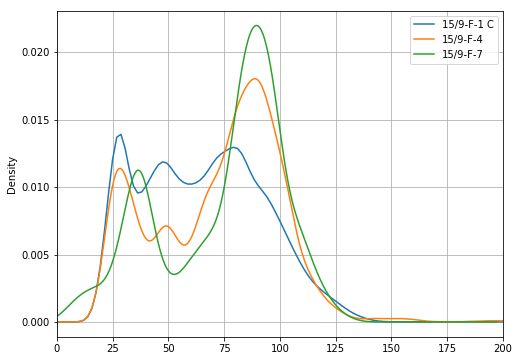

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
for label, df in wells:
    df.GR_NORM.plot(kind ='kde', ax=ax, label=label)
    plt.xlim(0, 200)
plt.grid(True)
plt.legend()
plt.savefig('after_normalisation.png', dpi=300)